"""
Iris Dataset Classification Model Documentation

Overview:
---------
This document provides documentation for training a classification model on the Iris dataset. The model aims to classify iris flowers into three species based on sepal and petal measurements.

Model Details:
--------------
- Model Type: Logistic Regression
- Evaluation Metric: Accuracy,Precision,Recall,F1_Score,Support
- Dataset: Iris Dataset (available in scikit-learn)

Data Visualization:
--------------------
1. Histograms:
   - Visualize the distribution of features (sepal and petal measurements) across different classes.

2. Scatter Plots:
   - Explore relationships between pairs of features using scatter plots.

3. Confusion Matrix:
   - Evaluate the model performance using a confusion matrix.

Data Preprocessing:
--------------------
1. Load the Iris dataset.
2. Check for missing values and handle if necessary.
3. Explore and visualize the data using histograms and scatter plots.
4. Split the data into training and testing sets.

Model Training:
---------------
1. Initialize the Logistic Regression model.
2. Train the model on the training data.
3. Make predictions on the test set.
4. Evaluate the different models performance using evaluation metrices.

Usage:
------
1. Import necessary libraries and modules.
2. Load and preprocess the Iris dataset.
3. Visualize the data through histograms and scatter plots.
4. Train the Logistic Regression model.
5. Evaluate the model using a confusion matrix.



In [2]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns

### Fetching DataSet

In [3]:
from ucimlrepo import fetch_ucirepo 
# fetch dataset 
iris = fetch_ucirepo(id=53)
print(iris)
print(type(iris))


{'data': {'ids': None, 'features':      sepal length  sepal width  petal length  petal width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns], 'targets':               class
0       Iris-setosa
1       Iris-setosa
2       Iris-setosa
3       Iris-setosa
4       Iris-setosa
..              ...
145  Iris-virginica
146  Iris-virginica
147  Iris-virginica
148  Iris-virginica
149  Iris-vir

In [4]:
data_iris = pd.DataFrame(data = iris.data.features)
data_iris.insert(4,"Class",iris.data.targets,True)
print(data_iris)

     sepal length  sepal width  petal length  petal width           Class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


### Stats about data


In [5]:
data_iris.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data_iris['Class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Class, dtype: int64

### Data Preproccessing & Cleaning

In [8]:
data_iris.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
Class           0
dtype: int64

### Data Visualization

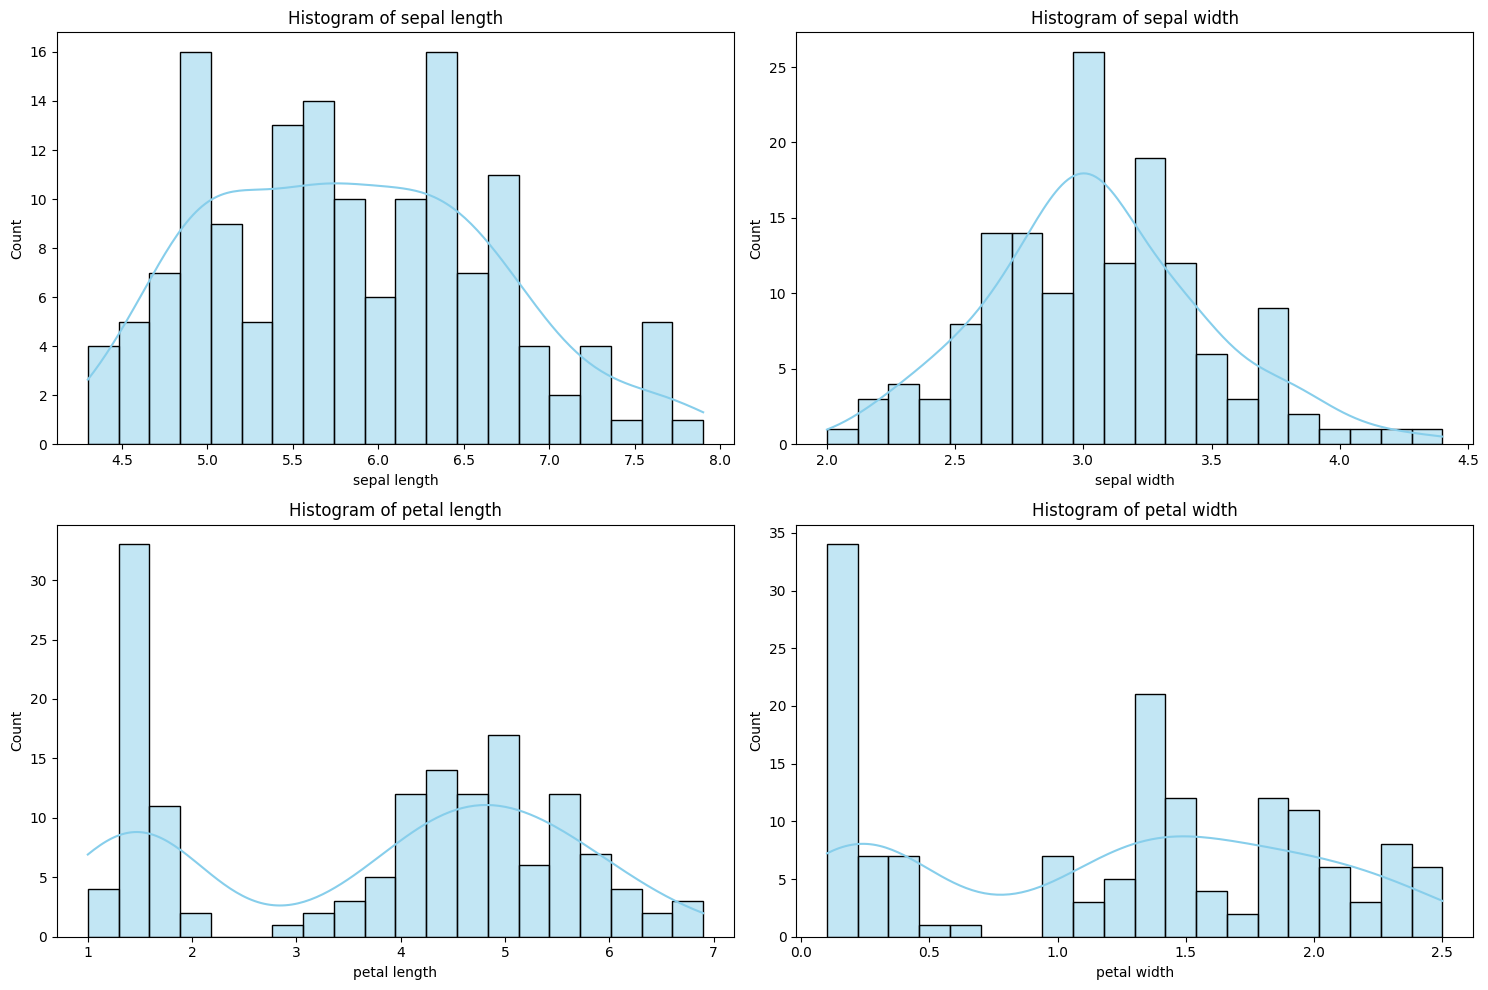

In [9]:
feature_names = ["sepal length", "sepal width", "petal length", "petal width"]
# 1. Create a DataFrame with the given data and column names

plt.figure(figsize=(15, 10))
for i, feature in enumerate(feature_names):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data=data_iris, x=feature, kde=True, bins=20, color='skyblue')
    plt.title(f'Histogram of {feature}')

plt.tight_layout()
plt.show()

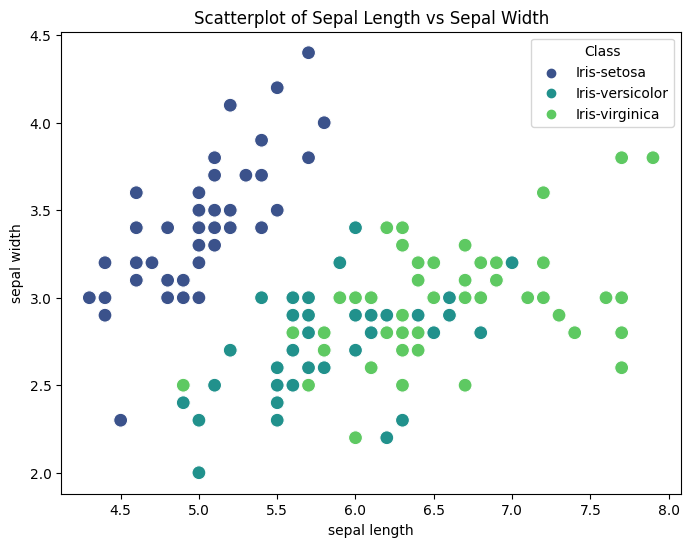

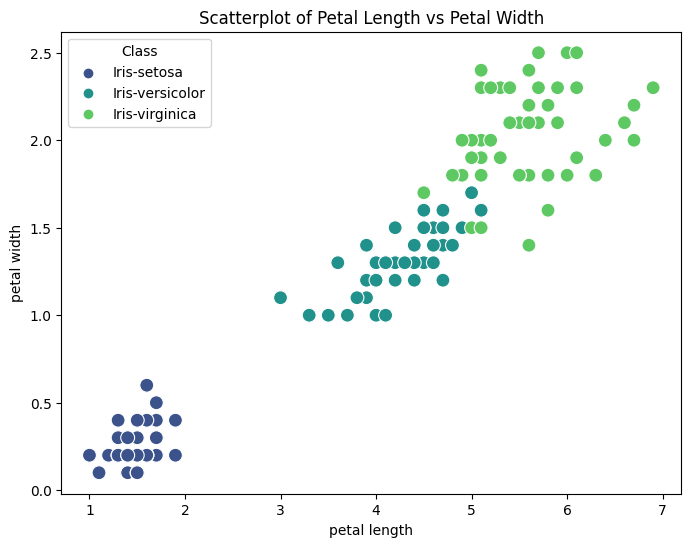

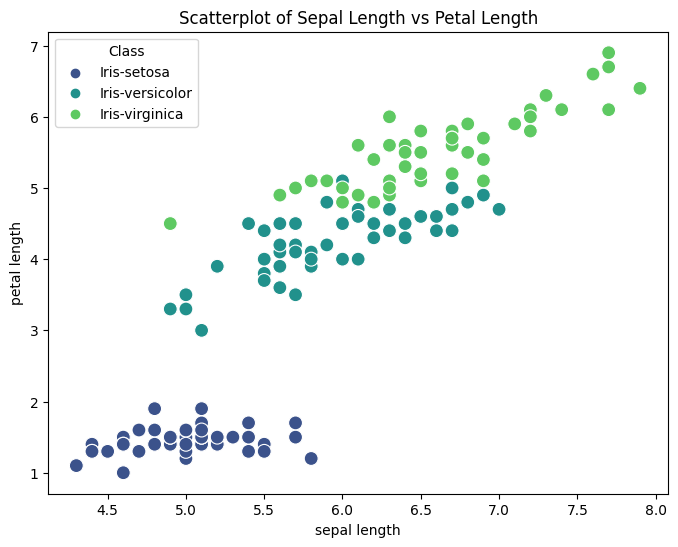

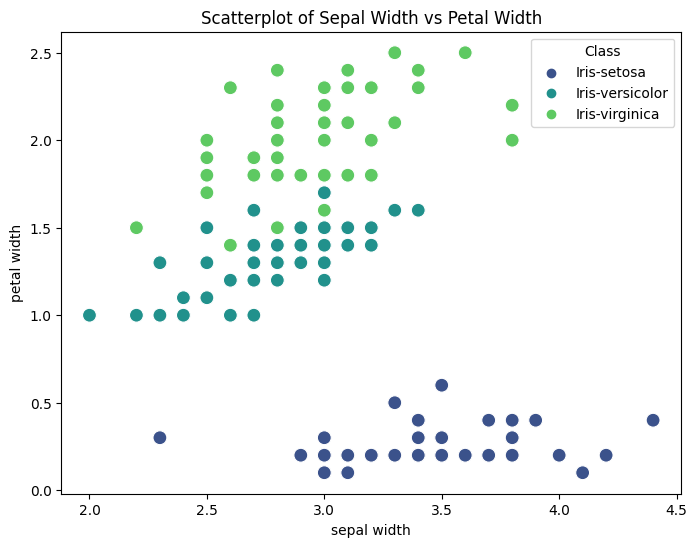

In [10]:
# Scatterplot for sepal length and sepal width
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data_iris, x='sepal length', y='sepal width', hue='Class', palette='viridis', s=100)
plt.title('Scatterplot of Sepal Length vs Sepal Width')
plt.show()

# Scatterplot for petal length and petal width
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data_iris, x='petal length', y='petal width', hue='Class', palette='viridis', s=100)
plt.title('Scatterplot of Petal Length vs Petal Width')
plt.show()

# Scatterplot for sepal length vs petal length
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data_iris, x='sepal length', y='petal length', hue='Class', palette='viridis', s=100)
plt.title('Scatterplot of Sepal Length vs Petal Length')
plt.show()

# Scatterplot for sepal width vs petal width
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data_iris, x='sepal width', y='petal width', hue='Class', palette='viridis', s=100)
plt.title('Scatterplot of Sepal Width vs Petal Width')
plt.show()

C:\Users\jatin varyani\AppData\Local\Temp\ipykernel_21052\3331050794.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_iris.corr(),annot=True)


<Axes: >

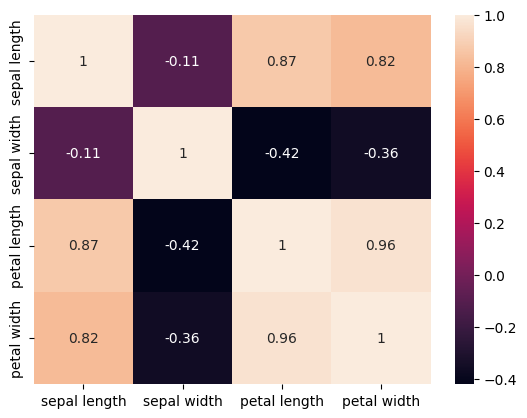

In [11]:
sns.heatmap(data_iris.corr(),annot=True)

In [12]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
data_iris["Class"] = enc.fit_transform(data_iris["Class"])
data_iris.head(10)

,sepal length,sepal width,petal length,petal width,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


### Model training and train test Split Data


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [14]:
# Split the dataset into training and testing sets
data_features = data_iris.drop(columns=["Class"])
data_target = data_iris["Class"]

X_train, X_test, y_train, y_test = train_test_split(data_features,data_target, test_size=0.2, random_state=42)

# Initialize models
svm_model = SVC(kernel='linear', C=1)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=3)

# Train models
svm_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

# Make predictions
svm_preds = svm_model.predict(X_test)
rf_preds = rf_model.predict(X_test)
knn_preds = knn_model.predict(X_test)




### Evaluation of Different Models

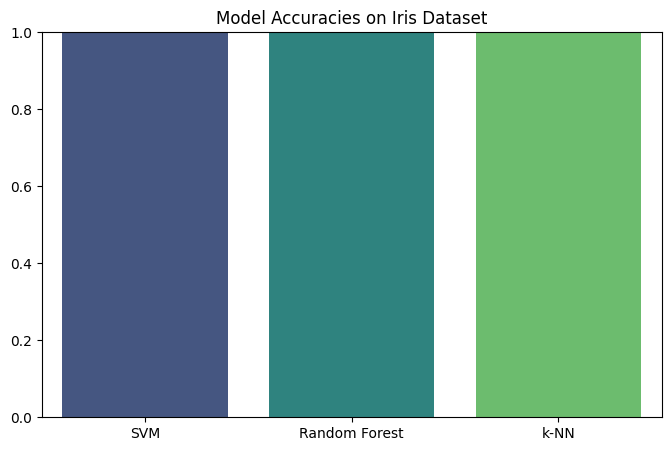

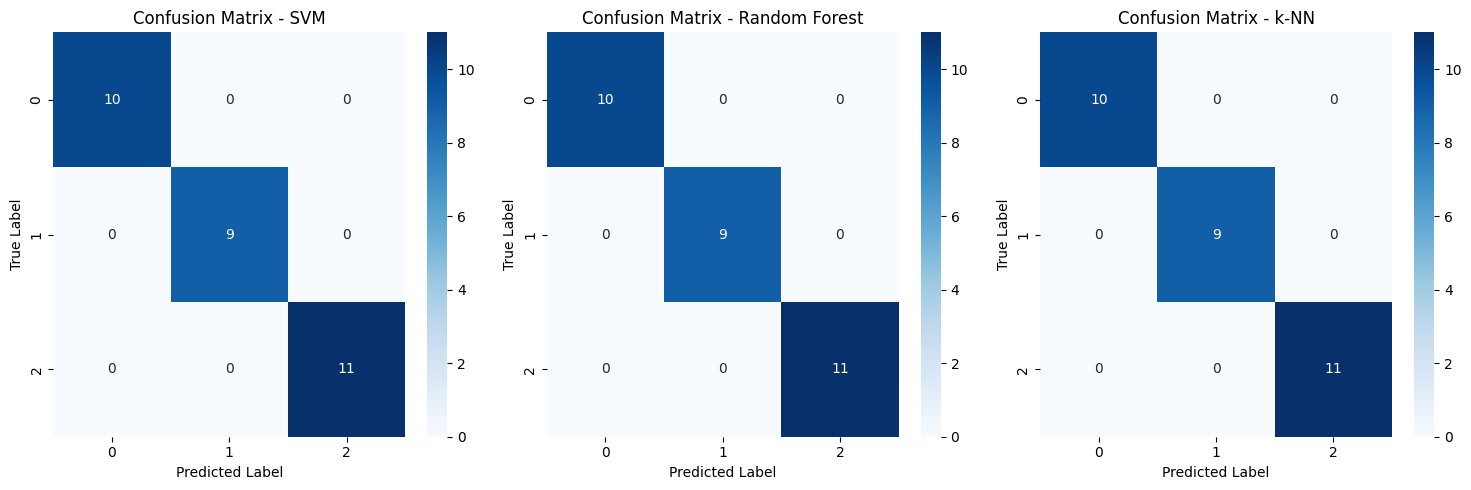

Classification Report - SVM:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Classification Report - k-NN:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.

In [15]:
# Evaluate models
models = ['SVM', 'Random Forest', 'k-NN']
accuracies = [accuracy_score(y_test, svm_preds), accuracy_score(y_test, rf_preds), accuracy_score(y_test, knn_preds)]

# Plot bar chart of accuracies
plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title('Model Accuracies on Iris Dataset')
plt.ylim([0, 1])
plt.show()

# Plot confusion matrix for each model
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, (model, preds) in enumerate(zip(models, [svm_preds, rf_preds, knn_preds])):
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'Confusion Matrix - {model}')
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')

plt.tight_layout()
plt.show()

# Display classification report for each model
for model, preds in zip(models, [svm_preds, rf_preds, knn_preds]):
    print(f"Classification Report - {model}:\n{classification_report(y_test, preds)}")